In [30]:
import warnings
warnings.filterwarnings("ignore")

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from acquire import get_telco_data
from prepare import prep_telco
from explore import train_validate_test_split
from explore import explore_univariate, explore_bivariate, explore_bivariate_categorical, explore_multivariate

from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression

from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

# Project Overview

This project is to analyze the customer data and identify the key driver for customer churning. 
I will be exploring the customer data, make an ML classification model, and predict the customers who are likely to churn.

## Goals
-Find the key drivers for customer churning <br>
-Create classification models <br>
-Predict the customers who are likely to churn

Initial Questions
- What are the correlation between customer data and churn rate?
- Do demographies affect churn rate?
- Do additional services affect churn rate?
- Do contract type affect churn rate?
- Do payment type affect churn rate?
- Do internet service type affect churn rate?

## Acquire
Using SQL query, the telco_churn.csv data was retrieved from the Codeup database. <br>
The SQL query is written to join the customers, contract_types, internet_service_types, and payment_types tables.

In [2]:
df = get_telco_data()

## Prepare
Drop the redundant id columns.

Clean the empty spaces in the total charge column and turn it into float type. 

Encode the bivariate categories and create dummy dataframes for 'contract_type','internet_service_type', 'payment_type'.

In [3]:
df = prep_telco(df)

In [10]:
# Split the dataframe into train, validate, and test dataset for analysis.
train, validate, test = train_validate_test_split(df, target = 'churn', seed =123)
train.shape, validate.shape, test.shape

((3943, 28), (1691, 28), (1409, 28))

## Explore
Split the data into train, validate, and test datasets.

Using bivariate method from explore.py, churning rates against categorical variables were analyzed

Excluded features that have similar churn rate for yes and no, i.e. phone_services, multiple_lines, is_male(gender)


Features | churn rate for no | churn rate for yes
------------- | ------------- | ------------- 
partner | 33% | 19%
dependents | 31% | 15%
online_security | 31% | 16%
online_backup | 29% | 21%
device_protection  | 29% | 22%
tech_support | 31% | 16%
streaming_tv | 24% | 30%
streaming_movies | 24% | 30%
paperless_billing | 16% | 33%
senior_citizen | 24% | 40%
contract_type_Month-to-month  | 7% | 42%
internet_service_type_DSL  | 31% | 19%
internet_service_type_Fiber optic  | 15% | 42%
payment_type_Bank transfer (automatic)| 30% | 15%
payment_type_Credit card (automatic)  | 29% | 16%
payment_type_Electronic check  | 17% | 45%
payment_type_Mailed check  | 28% | 20%

Looking at the churn rate, I will pick the ones with more than 40% of churn rate <br>
and do stats assessment to see if there is a correlation.<br>

Those are... <br>
-electronic check payment type,<br>
-fiber optic internet service type,<br>
-month-to-month contract type,<br>
-senior citizen



## Stats Test and Viz<br>

alpha = 0.05

$H_0$ = Churn rate and having a electronic check payment type are independent of each other.<br>
$H_1$ = Churn rate and having a electronic check payment type has correlation.

payment_type_Electronic check 
_____________________

         chi2        p-value  degrees of freedom
0  640.557084  2.528030e-141                   1

observed:
 churn                             0     1   All
payment_type_Electronic check                  
0                              3880   798  4678
1                              1294  1071  2365
All                            5174  1869  7043

expected:
              0            1
0  3436.599744  1241.400256
1  1737.400256   627.599744


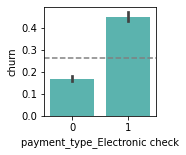


_____________________



In [4]:
explore_bivariate_categorical(df, 'churn', 'payment_type_Electronic check')


We reject the null hypothesis as there are correlation between electronic check payment type and churn rate.

$H_0$ = Churn rate and having a fiber optic internet service type are independent of each other.<br>
$H_1$ = Churn rate and having a fiber optic internet service type has correlation.

internet_service_type_Fiber optic 
_____________________

         chi2        p-value  degrees of freedom
0  666.808021  4.940476e-147                   1

observed:
 churn                                 0     1   All
internet_service_type_Fiber optic                  
0                                  3375   572  3947
1                                  1799  1297  3096
All                                5174  1869  7043

expected:
             0           1
0  2899.58512  1047.41488
1  2274.41488   821.58512


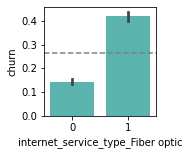


_____________________



In [5]:
explore_bivariate_categorical(df, 'churn', 'internet_service_type_Fiber optic')


We reject the null hypothesis as there are correlation between Fiber Optic internet type and churn rate.

$H_0$ = Churn rate and having a month-to-month contract type are independent of each other.<br>
$H_1$ = Churn rate and having a month-to-month contract type has correlation.

contract_type_Month-to-month 
_____________________

          chi2        p-value  degrees of freedom
0  1153.971661  6.147586e-253                   1

observed:
 churn                            0     1   All
contract_type_Month-to-month                  
0                             2954   214  3168
1                             2220  1655  3875
All                           5174  1869  7043

expected:
              0            1
0  2327.308249   840.691751
1  2846.691751  1028.308249


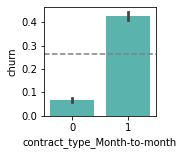


_____________________



In [6]:
explore_bivariate_categorical(df, 'churn', 'contract_type_Month-to-month')


We reject the null hypothesis as there are correlation between Month-to-Month contract type and churn rate.

$H_0$ = Churn rate and senior citizens are independent of each other.<br>
$H_1$ = Churn rate and senior citizens has correlation.

senior_citizen 
_____________________

       chi2       p-value  degrees of freedom
0  159.4263  1.510067e-36                   1

observed:
 churn              0     1   All
senior_citizen                  
0               4508  1393  5901
1                666   476  1142
All             5174  1869  7043

expected:
              0            1
0  4335.052392  1565.947608
1   838.947608   303.052392


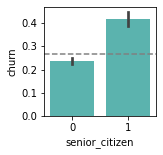


_____________________



In [7]:
explore_bivariate_categorical(df, 'churn', 'senior_citizen')

We reject the null hypothesis as there are correlation between senior citizens and churn rate.

Takeaways
From the above table, one can assume that customers who fall under the catgories of... <br>
no partner, <br>
no dependent, <br>
no addtional services (online security, backup, protection, tech support) <br>
paperless billing,<br>
senior citizen,<br>
month-to-month contract type,<br>
fiber optic internet service type,<br>
electronic check payment type

## Modeling
I will be using Random Forest, K-Nearest Neighbors, and Logistic Regression

In [13]:
#Baseline Evaluation for 
baseline = (train.churn == 0).mean()
baseline

0.7347197565305605

In [79]:
#store features and target variables
features = ['senior_citizen', 'dependents', 'paperless_billing',
            'payment_type_Electronic check',
            'internet_service_type_Fiber optic',
            'contract_type_Month-to-month', 'tenure']
target = 'churn'

In [80]:
#Split the train, validate, and test data
X_train = train[features]
y_train = train[[target]]

X_validate = validate[features]
y_validate = validate[[target]]

X_test = test[features]
y_test = test[[target]]

In [81]:
rf = RandomForestClassifier(min_samples_leaf=1, max_depth=10, random_state=123)
rf = rf.fit(X_train, y_train)

In [82]:
knn = KNeighborsClassifier(n_neighbors=10)
knn = knn.fit(X_train, y_train)

In [83]:
logit = LogisticRegression(random_state=123)
logit = logit.fit(X_train, y_train)

In [111]:
print(f'Training score for rf: {rf.score(X_train, y_train):.2%}')

print(f'Training score for knn: {knn.score(X_train, y_train):.2%}')

print(f'Training score for logit: {logit.score(X_train, y_train):.2%}')

Training score for rf: 84.76%
Training score for knn: 80.57%
Training score for logit: 79.23%


In [110]:
print(f'Validate score for rf: {rf.score(X_validate, y_validate):.2%}')

print(f'Validate score for knn: {knn.score(X_validate, y_validate):.2%}')

print(f'Validate score for logit: {logit.score(X_validate, y_validate):.2%}')

Validate score for rf: 77.59%
Validate score for knn: 76.88%
Validate score for logit: 79.18%


The rf and knn models are overfitting.
I will be using the logit model since the difference between training and validate scores are the lowest.

In [89]:
pred_test = logit.predict(X_test)
print(classification_report(y_test, pred_test))

              precision    recall  f1-score   support

           0       0.84      0.91      0.87      1035
           1       0.67      0.53      0.59       374

    accuracy                           0.81      1409
   macro avg       0.76      0.72      0.73      1409
weighted avg       0.80      0.81      0.80      1409



In [90]:
print(f'Training score: {logit.score(X_train, y_train):.2%}')
print(f'Validate score: {logit.score(X_validate, y_validate):.2%}')
print(f'Test score: {logit.score(X_test, y_test):.2%}')

Training score: 79.23%
Validate score: 79.18%
Test score: 80.62%


The test score is better than the training and validate score, and the scores were above the baseline score, which is 73.47%

## Prediction

In [103]:
pred_csv = pd.DataFrame()
pred_csv['Customer_ID'] = test['customer_id']
pred_csv['Prediction'] = logit.predict(X_test)
pred_csv = pred_csv.reset_index().drop(columns='index')
pred_csv

,Customer_ID,Prediction
0,4531-AUZNK,0
1,2296-DKZFP,0
2,9692-TUSXH,1
3,5129-JLPIS,1
4,1273-MTETI,1
...,...,...
1404,1597-FZREH,0
1405,9117-SHLZX,0
1406,8441-SHIPE,0
1407,3511-BFTJW,0


In [104]:

proba_df = pd.DataFrame(logit.predict_proba(X_test), columns= ['no_churn_proba', 'churn_proba'])
proba_df.drop(columns='no_churn_proba', inplace= True)


In [105]:
df = pd.concat([pred_csv, proba_df], axis=1)
df.head()

,Customer_ID,Prediction,churn_proba
0,4531-AUZNK,0,0.110469
1,2296-DKZFP,0,0.018618
2,9692-TUSXH,1,0.641862
3,5129-JLPIS,1,0.591009
4,1273-MTETI,1,0.781126


In [106]:
df.to_csv('predictions.csv')

## Conclusion

## Summary
Key drivers for the churning were identified and models were developed. Logistic regression predicted the best out of other models used. The logistic regression model was used as the difference in train and validate dataset was the lowest. The model was able to predict the churn rate at a 80.62% accuracy level on a test dataset. This is greater than the baseline accuracy level, which is 73.47%.

Question on the correlation between the bivariate category variables and the churn rate were observed, and were found that the correlation exists in churn rate against demographies, additional services, contract type, payment type, and internet service type.

## Key drivers for churning are:

Demography - Senior or No dependents<br>
Paperless billing<br>
Payment Type of Electronic Check<br>
Internet Service Type of Fiber Optic<br>
Contract Type of Month-to-Month<br>
Tenure

## Recommendation:
Even though fiber optic is more high tech than DSL, its churn rate is high. There may be an issue with the technology.
Senior citizens or customers with no dependents are more likely to churn; hence, programs aimed towards those group should be devised.
Payment type of electronic check churn at high rate. It is a non-automatic payment method, and they should be given incentives to switch to automatic payment.
Month-to-month customers churns the most out of other contract type, and there should be incentives for the short-term contracts.

## Next Step:
With more time, I would like to explore more features and try different combinations of features to increase the model accuracy.